In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Export Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import joblib
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn_pandas import DataFrameMapper

In [ ]:
origin_train_data= pd.read_csv('/content/drive/My Drive/train.csv')
origin_test_data= pd.read_csv('/content/drive/My Drive/test.csv')

In [ ]:
train_data = origin_train_data.copy()
train_data_copy1 = origin_train_data.copy()

In [ ]:
info_df = pd.DataFrame()
info_df['missing_val'] = train_data.isnull().sum()
info_df['missing_val_ratio'] = (info_df['missing_val'] / train_data.shape[0] * 100).round().astype(int)
info_df.head(40)

,missing_val,missing_val_ratio
Id,0,0
BuildingCategory,0,0
ZoningClassification,0,0
StreetLineLength,259,18
ParcelSize,0,0
RoadAccessType,0,0
AlleyAccessType,1369,94
ParcelShape,0,0
TerrainFlatness,0,0
UtilityAvailability,0,0


In [ ]:
info_df = pd.DataFrame()
info_df['missing_val'] = train_data.isnull().sum()
info_df['missing_val_ratio'] = (info_df['missing_val'] / train_data.shape[0] * 100).round().astype(int)
info_df.tail(41)

,missing_val,missing_val_ratio
HeatingQuality,0,0
AirConditioning,0,0
ElectricalSystem,1,0
GroundFloorArea,0,0
UpperFloorArea,0,0
LowQualityArea,0,0
LivingArea,0,0
BasementFullBathrooms,0,0
BasementHalfBathrooms,0,0
FullBathrooms,0,0


# Cleaning data

<div dir="rtl">
سنقم بحذف الاعمدة التي تحتوي على اكثر من 40% missing values، وهي كالتالي:
</div> <div dir="rtl">
'AlleyAccessType','PoolQuality', 'FenceQuality', 'AdditionalFeature', MasonryType, FireplaceQuality</div>
<div dir="rtl">
بالإضافة للعمود id لعدم اهميته في التحليل</div>

<div dir="rtl">
الان سنقوم يمعالجة بقية ال missing values
</div>

In [ ]:
train_data['StreetLineLength'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: StreetLineLength, dtype: float64

<ipython-input-13-a797238b3071>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data['StreetLineLength'], shade=True)


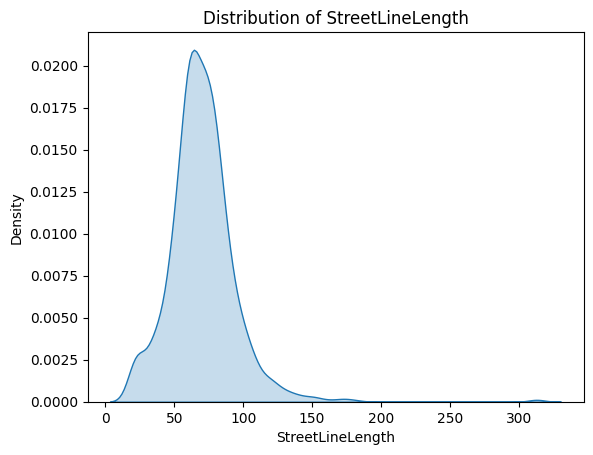

In [ ]:
sns.kdeplot(train_data['StreetLineLength'], shade=True)
plt.xlabel('StreetLineLength')
plt.ylabel('Density')
plt.title('Distribution of StreetLineLength')
plt.show()


<div dir="rtl">
نلاحظ وجود skewed لذلك سنستخدم ال median لتعبئة القيم المفقودة في العمود StreetLineLength
</div>








In [ ]:
train_data['UtilityAvailability'].value_counts()

UtilityAvailability
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

<div dir="rtl">
بالنسبة للعمود UtilityAvailability
جميع الاسطر تحتوي نفس القيمة ما عدا سطر واحد، هذا يعني أن العمود لا يئثر بشكل كبير على التحليل، لذلك سنقوم بتجاهله ايضاً
</div>

<div dir="rtl">
القيم المفقودة في عمود MasonrySize كانت تقابل قيم مفقودة ايضا في العمود MasonryType الذي تم حذفه، وهذا يعني عدم وجود Masonry لذلك تم تعبئتها بالقيمة 0
</div>

In [ ]:
missing_condition = (
    train_data['BasementHeight'].isnull() &
    train_data['BasementCondition'].isnull() &
    train_data['BasementAccess'].isnull() &
    train_data['BasementFinish1'].isnull() &
    train_data['BasementFinish2'].isnull()

)
train_data.loc[missing_condition, ['BasementFinishedArea1', 'BasementFinishedArea2','BasementUnfinishedArea']]

,BasementFinishedArea1,BasementFinishedArea2,BasementUnfinishedArea
17,0,0,0
39,0,0,0
90,0,0,0
102,0,0,0
156,0,0,0
182,0,0,0
259,0,0,0
342,0,0,0
362,0,0,0
371,0,0,0


In [ ]:
train_data[['ElectricalSystem', 'AirConditioning', 'HeatingQuality', 'HeatingType']]

,ElectricalSystem,AirConditioning,HeatingQuality,HeatingType
0,SBrkr,Y,Ex,GasA
1,SBrkr,Y,Ex,GasA
2,SBrkr,Y,Ex,GasA
3,SBrkr,Y,Gd,GasA
4,SBrkr,Y,Ex,GasA
...,...,...,...,...
1455,SBrkr,Y,Ex,GasA
1456,SBrkr,Y,TA,GasA
1457,SBrkr,Y,Ex,GasA
1458,FuseA,Y,Gd,GasA


In [ ]:
train_data[['ElectricalSystem', 'AirConditioning', 'HeatingQuality', 'HeatingType']].describe(include=object)

,ElectricalSystem,AirConditioning,HeatingQuality,HeatingType
count,1459,1460,1460,1460
unique,5,2,5,6
top,SBrkr,Y,Ex,GasA
freq,1334,1365,741,1428


<div dir="rtl">
يوجد قيمة وحيدة مفقودة في العمود ElectricalSystem، سنقوم بتعبئتها بالقيمة لاكثر تكرارا SBrkr
</div>

In [ ]:
missing_condition = (
    train_data['GarageLocation'].isnull() &
    train_data['GarageConstructionYear'].isnull() &
    train_data['GarageInterior'].isnull() &
    train_data['GarageQuality'].isnull() &
    train_data['GarageCondition'].isnull()
)
train_data.loc[missing_condition, ['GarageCapacity', 'GarageSize']]

,GarageCapacity,GarageSize
39,0,0
48,0,0
78,0,0
88,0,0
89,0,0
...,...,...
1349,0,0
1407,0,0
1449,0,0
1450,0,0


<div dir="rtl">
بنفس الطريقة السابقة ولنفس الاسباب، سنقوم بتعبئة ال missing values بقيمة ثابتة
</div>

### cleaning_data

In [ ]:
def cleaning_data(data):
    # حذف الأعمدة غير المرغوب فيها
    data.drop(['AlleyAccessType','PoolQuality', 'FenceQuality', 'AdditionalFeature',
              'MasonryType', 'FireplaceQuality', 'UtilityAvailability'], axis=1, inplace=True)

    # تعبئة القيم المفقودة في عمود 'StreetLineLength' بالقيمة الوسيطية
    median_value = data['StreetLineLength'].median()
    data['StreetLineLength'].fillna(median_value, inplace=True)

    # تعبئة القيم المفقودة في أعمدة القبو بالقيمة 'No Basement'
    basement_columns = ['BasementHeight', 'BasementCondition', 'BasementAccess', 'BasementFinish1', 'BasementFinish2']
    for column in basement_columns:
        data[column].fillna('No Basement', inplace=True)

    # تعبئة القيم المفقودة في عمود 'ElectricalSystem' بالقيمة الأكثر تكرارًا
    data['ElectricalSystem'].fillna(data['ElectricalSystem'].mode()[0], inplace=True)

    # تعبئة القيم المفقودة في أعمدة الكراج بالقيمة 'No Garage'
    garage_columns = ['GarageLocation', 'GarageInterior', 'GarageQuality', 'GarageCondition']
    for column in garage_columns:
        data[column].fillna('No Garage', inplace=True)

    # تعبئة القيم المفقودة في عمود 'GarageConstructionYear' بالقيمة 0
    data['GarageConstructionYear'].fillna(0, inplace=True)

    # التعامل مع القيم المفقودة في بقية الأعمدة
    for column in data.columns:
        if data[column].isnull().sum() > 0:  # التحقق من وجود قيم مفقودة
            if data[column].dtype == 'object':  # إذا كان العمود نصيًا أو فئويًا
                data[column].fillna(data[column].mode()[0], inplace=True)
            else:  # إذا كان العمود رقميًا
                data[column].fillna(data[column].mean(), inplace=True)

    return data


### split data

In [ ]:
# تحديد الميزات والمتغير الهدف
X = train_data_copy1.drop('OutcomeVariable', axis=1)  # استبدل 'OutcomeVariable' باسم العمود الهدف
y = train_data_copy1['OutcomeVariable']

# تقسيم البيانات إلى مجموعات التدريب والاختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1168, 80)
Shape of X_test: (292, 80)
Shape of y_train: (1168,)
Shape of y_test: (292,)


### preprocessor

In [ ]:
# تحديد الأعمدة العددية والتصنيفية
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# إعداد المعالجات للأعمدة العددية والتصنيفية
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# دمج المعالجات باستخدام ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Linear Regression

<div dir="rtl">
بعد تنظيف البيانات سنقوم بتنفيذ الاختبار الاول عليها باستخدام Linear Regression
</div>

In [ ]:
# إنشاء البايبلاين الكامل
linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())])

# تدريب النموذج
linear_pipeline.fit(X_train, y_train)

# إجراء التنبؤات
y_pred_test = linear_pipeline.predict(X_test)
y_pred_train = linear_pipeline.predict(X_train)

# تقييم النموذج
r2_linear_test = r2_score(y_test, y_pred_test)
r2_linear_train = r2_score(y_train, y_pred_train)


print(f"R2 Score for test: {r2_linear_test}")
print(f"R2 Score for train: {r2_linear_train}")

R2 Score for test: 0.8851633470109125
R2 Score for train: 0.9340368309103546


# Ridge Regression

In [ ]:
# إنشاء البايبلاين
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', Ridge())])

# تدريب النموذج
ridge_pipeline.fit(X_train, y_train)

# إجراء التنبؤات وتقييم النموذج
y_pred_ridge_test = ridge_pipeline.predict(X_test)
y_pred_ridge_train = ridge_pipeline.predict(X_train)

r2_ridge_test = r2_score(y_test, y_pred_ridge_test)
r2_ridge_train = r2_score(y_train, y_pred_ridge_train)

print(f"Ridge Regression - R2 Score for test: {r2_ridge_test}")
print(f"Ridge Regression - R2 Score for train: {r2_ridge_train}")

Ridge Regression - R2 Score for test: 0.8890115555750278
Ridge Regression - R2 Score for train: 0.9187744463424707


# Lasso Regression

In [ ]:
# إنشاء البايبلاين
lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', Lasso())])

# تدريب النموذج
lasso_pipeline.fit(X_train, y_train)

# إجراء التنبؤات وتقييم النموذج
y_pred_lasso_test = lasso_pipeline.predict(X_test)
y_pred_lasso_train = lasso_pipeline.predict(X_train)

r2_lasso_test = r2_score(y_test, y_pred_lasso_test)
r2_lasso_train = r2_score(y_train, y_pred_lasso_train)

print(f"Lasso Regression - R2 Score for test: {r2_lasso_test}")
print(f"Lasso Regression - R2 Score for train: {r2_lasso_train}")

Lasso Regression - R2 Score for test: 0.8960400242929325
Lasso Regression - R2 Score for train: 0.9360358055282665


# Grid Search

### Ridge

In [ ]:
ridge_params = {
    'model__alpha': [0.1, 1.0, 10.0, 100.0]
}

# تطبيق GridSearchCV على Ridge Regression
ridge_grid = GridSearchCV(ridge_pipeline, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)

# الحصول على أفضل المعاملات وتقييم النتائج
ridge_best_model = ridge_grid.best_estimator_

# التنبؤ باستخدام أفضل نموذج Ridge
y_train_pred_ridge = ridge_best_model.predict(X_train)
y_test_pred_ridge = ridge_best_model.predict(X_test)

# حساب R-squared score
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

# عرض النتائج
print(f"Best Ridge Model Alpha: {ridge_grid.best_params_['model__alpha']}")
print(f"Ridge Train R2 Score: {r2_train_ridge}")
print(f"Ridge Test R2 Score: {r2_test_ridge}")

Best Ridge Model Alpha: 10.0
Ridge Train R2 Score: 0.896743356136692
Ridge Test R2 Score: 0.8792127282895595


### Lasso

In [ ]:
# Grid Search للـ Lasso
lasso_params = {
    'model__alpha': [0.01, 0.1, 1.0, 10.0, 15.0, 20.0]
}

# تطبيق GridSearchCV على Lasso Regression
lasso_grid = GridSearchCV(lasso_pipeline, lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train, y_train)

# الحصول على أفضل المعاملات وتقييم النتائج
lasso_best_model = lasso_grid.best_estimator_

# التنبؤ باستخدام أفضل نموذج Lasso
y_train_pred_lasso = lasso_best_model.predict(X_train)
y_test_pred_lasso = lasso_best_model.predict(X_test)

r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

print(f"Best Lasso Model Alpha: {lasso_grid.best_params_['model__alpha']}")
print(f"Lasso Train R2 Score: {r2_train_lasso}")
print(f"Lasso Test R2 Score: {r2_test_lasso}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81683770406.21191, tolerance: 537415025.1745832
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58222860718.20828, tolerance: 572016182.2224231
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66297682183.38811, tolerance: 525605188.80204767
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: Converg

Best Lasso Model Alpha: 20.0
Lasso Train R2 Score: 0.9324151900365222
Lasso Test R2 Score: 0.8983969639750835


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3536288392.2193604, tolerance: 696659484.3571944
  model = cd_fast.sparse_enet_coordinate_descent(


# Ensemble Learning


### Random Forest

In [ ]:
# إنشاء البايبلاين
rf_pipeline = make_pipeline(preprocessor, RandomForestRegressor(n_estimators=100, random_state=42))

# تدريب النموذج
rf_pipeline.fit(X_train, y_train)

# إجراء التنبؤات وتقييم النموذج
y_pred_rf_test = rf_pipeline.predict(X_test)
y_pred_rf_train = rf_pipeline.predict(X_train)

r2_rf_test = r2_score(y_test, y_pred_rf_test)
r2_rf_train = r2_score(y_train, y_pred_rf_train)


print(f"Random Forest - R2 Score for test: {r2_rf_test}")
print(f"Random Forest - R2 Score for train: {r2_rf_train}")

Random Forest - R2 Score for test: 0.8938754313571826
Random Forest - R2 Score for train: 0.9795993840218196




### Gradient Boosting




In [ ]:
# إنشاء البايبلاين
gb_pipeline = make_pipeline(preprocessor, GradientBoostingRegressor(n_estimators=100, random_state=42))

# تدريب النموذج
gb_pipeline.fit(X_train, y_train)

# إجراء التنبؤات وتقييم النموذج
y_pred_gb_test = gb_pipeline.predict(X_test)
y_pred_gb_train = gb_pipeline.predict(X_train)

r2_gb_test = r2_score(y_test, y_pred_gb_test)
r2_gb_train = r2_score(y_train, y_pred_gb_train)

print(f"Gradient Boosting - R2 Score for test: {r2_gb_test}")
print(f"Gradient Boosting - R2 Score for train: {r2_gb_train}")

Gradient Boosting - R2 Score for test: 0.8906502195945736
Gradient Boosting - R2 Score for train: 0.9703205404217103


# توثيق النتائج

In [ ]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
              'Lasso Grid Search', 'Ridge Grid Search','Random Forest', 'Gradient Boosting'],
    'R2 Score ': [r2_linear_test, r2_ridge_test, r2_lasso_test, r2_test_lasso ,r2_test_ridge, r2_rf_test, r2_gb_test],
})
results

,Model,R2 Score
0,Linear Regression,0.885163
1,Ridge Regression,0.889012
2,Lasso Regression,0.895931
3,Lasso Grid Search,0.900422
4,Ridge Grid Search,0.879213
5,Random Forest,0.893875
6,Gradient Boosting,0.890650


# The best model with R_Score

In [ ]:
cleaning_data(train_data_copy1)

# Create the pipeline
pipeline = Pipeline(steps=[
                           ('preprocessor', preprocessor),
                           ('model', Lasso(alpha=lasso_grid.best_params_['model__alpha']))])


# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict on training data
y_train_pred = pipeline.predict(X_train)

# Predict on new data
y_test_pred = pipeline.predict(X_test)

# Print R^2 score on training data
print("R^2 score on training data: ", r2_score(y_train, y_train_pred))

# Print R^2 score on testing data
print("R^2 score on testing data: ", r2_score(y_test, y_test_pred))

R^2 score on training data:  0.9324151900365222
R^2 score on testing data:  0.8983969639750835


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3536288392.2193604, tolerance: 696659484.3571944
  model = cd_fast.sparse_enet_coordinate_descent(


In [ ]:
# حفظ النموذج المدرب إلى ملف
joblib.dump(pipeline, 'lasso_pipeline.pkl')

['lasso_pipeline.pkl']

In [ ]:
# التنبؤ باستخدام النموذج المدرب
y_train_pred_lasso = pipeline.predict(X_train)
y_test_pred_lasso = pipeline.predict(X_test)

# حساب R-squared score
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

# عرض النتائج
print(f"Lasso Train R2 Score: {r2_train_lasso}")
print(f"Lasso Test R2 Score: {r2_test_lasso}")

Lasso Train R2 Score: 0.9324151900365222
Lasso Test R2 Score: 0.8983969639750835


In [ ]:
# تحميل النموذج المحفوظ
loaded_pipeline = joblib.load('lasso_pipeline.pkl')

# قراءة البيانات الجديدة
test_copy1 = origin_test_data.copy()

# التنبؤ باستخدام النموذج المحمل
#cleaned_data = cleaning_data(test_copy1)
predictions = loaded_pipeline.predict(test_copy1)
result = pd.DataFrame({'Id': test_copy1['Id'],'SalePrice': predictions})
result.to_csv('final predictions.csv', index=False)

,Id,SalePrice
0,1461,115702.915494
1,1462,160785.510207
2,1463,180825.496395
3,1464,196189.091848
4,1465,211104.274293
...,...,...
1454,2915,74705.713068
1455,2916,77432.482665
1456,2917,172874.325607
1457,2918,105100.805220


In [ ]:
result.to_csv('final predictions.csv', index=False)